# 서울 자전거 수요량 데이터

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #시각화 패키지
import seaborn as sns #시각화 패키지
plt.style.use('fivethirtyeight') # 테마바꾸기
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data=pd.read_csv('./SeoulBikeData.csv', engine='python', encoding='CP949')
data.head() # data 확인

,Date,Rented Bike Count,Hour,Temperature(ºC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ºC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Date : 일/월/년

Rented Bike count - 시간당 대여 횟수

Hour - 하루 시간

Temperature-섭씨기온

Humidity - 습도(%)

Windspeed - 풍속(m/s)

Visibility - 가시거리(10m)

Dew point temperature - 이슬점(Celsius)

Solar radiation - 자외선 지수(MJ/m2)

Rainfall - 강우량(mm)

Snowfall - 강설량(cm)

Seasons - 계절(Winter, Spring, Summer, Autumn)

Holiday - 주말/평일(Holiday/No holiday)

Functional Day - 비운행일, 운행일 (NoFunc(Non Functional Hours), Fun(Functional hours))

In [134]:
data.isnull().sum() # 전체 결측치 확인

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(ºC)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(ºC)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [135]:
data.describe()

,Rented Bike Count,Hour,Temperature(ºC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ºC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Functioning day 변수는 자전거 대여 정책이 실시되는 Yes와 실시하지 않는 No로 구분된다. Functioning day가 1(no)인 날은 자전거 대여가 당연히 0일 수밖에 없고 이에 관련된 다른 변수들이 예측을 위한 분석과정에 포함될 경우 정확도를 낮출 수 있어 Functioning day의 Yes와 No를 0과 1로 변환한 후에 0인 데이터만 선별. 마지막엔 Functioning day 변수를 제거했다.

In [136]:
data['Functioning Day'].replace(['Yes','No'],[0,1],inplace=True)
data=data.loc[data['Functioning Day']==0]
data.head()

,Date,Rented Bike Count,Hour,Temperature(ºC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ºC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,0


In [137]:
data.drop("Functioning Day",axis=1,inplace=True)

In [138]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(ºC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ºC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday


변수 중에서 설명이 필요할 것 같은 데이터는 time(시간), seasons(계절), visibility(가시성), holiday(휴일 여부), functioning day(정책 실행 여부), rainfall(강수량), Dew point temperature(이슬점), solar radiation(자외선 지수) 등이었다.

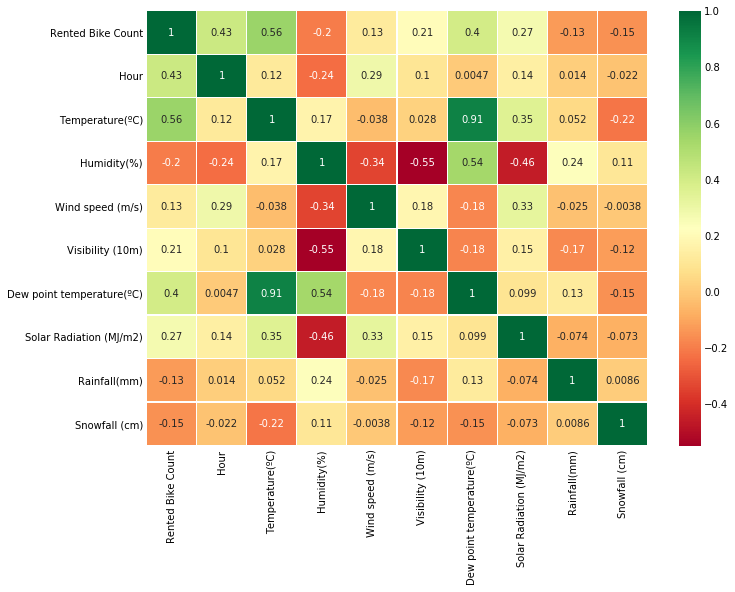

In [139]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 

fig=plt.gcf() # fig에 접근
fig.set_size_inches(10,8) # fig그림 크기 조절
plt.show()

변수들간의 상관관계가 높은 변수들은 다음과 같다.

이슬점 & 온도 : 0.91
가시거리 & 습도 : -0.55
이슬점 & 습도 : 0.54
자외선 지수 & 습도 : -0.46
자전거 대여(target) & 온도 : 0.56
자전거 대여(target) & 시간 : 0.43

이슬점 & 온도의 상관관계가 0.91로써 매우 높게 나왔다.
이는 종속성이 높아 하나의 변수로 둘을 설명할 수 있으니 한 변수를 제거해도 되지 않냐는 의견이 나옴. 거기에 더해 그러면 이 둘을 PCA를 통해 하나의 변수로 생성하면 되지 않냐는 의견이 나옴. 하지만 이는 전체 변수를 중요도에 따른 몇 개의 변수로 줄이는 것이기에 이슬점과 온도의 변수 중에서 하나를 제거해야 한다는 생각과는 다른 종류라고 판단함. 이는 차후 결정을 해봐야 할 것으로 생각됨.

#### Seasons과 Holiday변수는 범주형 자료이므로 원핫인코딩을 적용

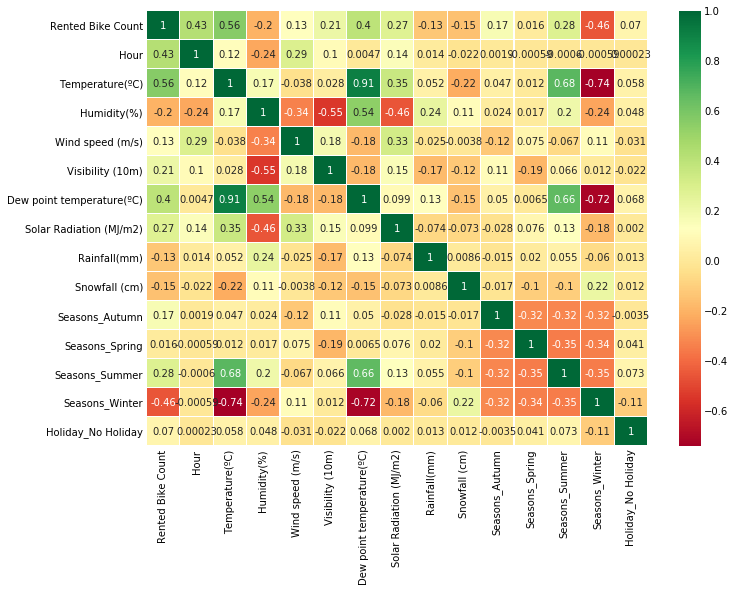

In [140]:
data.drop("Date",axis=1,inplace=True)
data1 = pd.get_dummies(data)
data1.drop("Holiday_Holiday",axis=1,inplace=True)

sns.heatmap(data1.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 

fig=plt.gcf() # fig에 접근
fig.set_size_inches(10,8) # fig그림 크기 조절
plt.show()

seasons랑 holiday는 연속형이 아닌 범주형 자료로서 분석에서 데이터로 고려될 경우 수치적 상관관계 혹은 분석 결과에 영향을 미칠 것 같다는 의견이 나옴.

하지만 이와 같은 생각은 연속형 자료들을 하나의 연산에 대입하는 회귀 분석에 사용되는 개념으로써 패턴을 학습하고 이를 바탕으로 결과를 예측하는 분류에는 알맞지 않다고 판단함.

따라서 seasons 변수랑 holiday 변수의 결과값을 1, 2, 3, 4랑 라벨 인코딩으로 변환하여 값을 비교해봄.(seasons는 1: spring, 2: summer, 3: fall, 4: winter. holiday는 0: no holiday, 1: holiday)

In [141]:
data['Seasons'].replace(['Spring','Summer','Autumn','Winter'],[1,2,3,4],inplace=True)
data['Holiday'].replace(['No Holiday','Holiday'],[0,1],inplace=True)

data.head()

,Rented Bike Count,Hour,Temperature(ºC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ºC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,0


In [142]:
data.describe()

,Rented Bike Count,Hour,Temperature(ºC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ºC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
count,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.000000,8465.00000,8465.000000,8465.000000,8465.000000
mean,729.156999,11.507029,12.771057,58.147194,1.725883,1433.873479,3.944997,0.567868,0.14912,0.077685,2.483993,0.048198
std,642.351166,6.920899,12.104375,20.484839,1.034281,609.051229,13.242399,0.868245,1.12554,0.444063,1.127194,0.214198
min,2.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.00000,0.000000,1.000000,0.000000
25%,214.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.00000,0.000000,1.000000,0.000000
50%,542.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.00000,0.000000,2.000000,0.000000
75%,1084.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.00000,0.000000,4.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.00000,8.800000,4.000000,1.000000


통계학에서는 결과값(정확도)와 변수와의 목표를 유의미하게 설명하는 것이 목표.
머신러닝은 정확도를 최대로 올리는 것이 목표.
정확도와 유의미한 설명을 위해 정확도를 포기해야 하는 것은 데이터 분석 과정 중에서 계속 유념하고 토론해야 될 사안으로 판단.

## 머신러닝

머신러닝에 들어가기에 앞서 target값을 Rented Bike Count변수를 목표로 한다.

지도 학습에는 분류(Classification)와 회귀(Regression)가 있다.

분류는 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성한다. 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것이다.
분류는 두 개로 분류하는 이진 분류(binary classification)과 셋 이상으로 분류하는 다중 분류(multiclass classification)으로 나누어 진다.

회귀는 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법으로 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적에 회귀 계수를 찾아내는 것이다.
이 때 연속적인 숫자(실수)를 예측하므로 출력 값에 연속성이 있다면 회귀 문제라고 볼 수 있다.

우리가 구하고자하는 target값인 Rented Bike Count는 이산형으로 수치형 자료이다.
따라서 분류보다는 회귀모델을 적용시켜 분석하는 것이 바람직하다.

이를 위해서 라벨 인코딩보다는 원핫 인코딩이 범주형 자료를 수치적으로 잘 표현했다고 판단했고 이 데이터를 사용하기로 한다.
먼저 회귀 모델 적용에 앞서 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현 됐기 때문에 사전에 표준화를 적용시켜준다.

In [11]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(data1)
data_scale = scaler.transform(data1)
data_scale=pd.DataFrame(data=data_scale,columns=data1.columns)

data_scale.head()

,Rented Bike Count,Hour,Temperature(ºC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ºC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday
0,-0.739759,-1.662748,-1.484762,-1.032395,0.458429,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,-0.544722,-0.585308,-0.594041,1.708503,0.225032
1,-0.817603,-1.518249,-1.509548,-0.983575,-0.895248,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,-0.544722,-0.585308,-0.594041,1.708503,0.225032
2,-0.865866,-1.373751,-1.550858,-0.934756,-0.701865,0.929577,-1.634619,-0.654079,-0.132495,-0.174951,-0.544722,-0.585308,-0.594041,1.708503,0.225032
3,-0.968619,-1.229252,-1.567382,-0.885937,-0.798556,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,-0.544722,-0.585308,-0.594041,1.708503,0.225032
4,-1.013769,-1.084754,-1.550858,-1.081214,0.555121,0.929577,-1.702586,-0.654079,-0.132495,-0.174951,-0.544722,-0.585308,-0.594041,1.708503,0.225032


In [12]:
data_log=np.log1p(data)

data_log.head()

,Rented Bike Count,Hour,Temperature(ºC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ºC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,5.541264,0.000000,NaN,3.637586,1.163151,7.601402,NaN,0.0,0.0,0.0,1.609438,0.0
1,5.323010,0.693147,NaN,3.663562,0.587787,7.601402,NaN,0.0,0.0,0.0,1.609438,0.0
2,5.159055,1.098612,NaN,3.688879,0.693147,7.601402,NaN,0.0,0.0,0.0,1.609438,0.0
3,4.682131,1.386294,NaN,3.713572,0.641854,7.601402,NaN,0.0,0.0,0.0,1.609438,0.0
4,4.369448,1.609438,NaN,3.610918,1.193922,7.601402,NaN,0.0,0.0,0.0,1.609438,0.0


data값에 음수값이 존재하므로 로그변환을 했을 경우 결측치가 생기게 된다
이러한 점에서 회귀 기법을 위한 표준화를 로그변환이 아닌 StandardScaler함수를 사용하여 표준화시켰다.

In [13]:
y_target_scale = data_scale['Rented Bike Count']
X_data_scale = data_scale.drop(['Rented Bike Count'], axis=1,inplace=False)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data_scale, y_target_scale,
                                                    test_size=0.2, random_state=0)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(rmse)

0.6712275112864038


피처값은 총 12개로 Rented Bike Count에 큰 영향을 미치지 않는 변수들을 제거하여 학습속도를 조금 더 높이고자한다.

이 때 target값과 상관관계가 낮은 변수들이 큰 의미가 없다고 가정하여 이 변수를 제거해야할지
피처간 상관관계가 높은 즉, 하나의 변수로도 두가지의 변수를 설명할수있는 피처를 제거해야할지 의문이 든다.

target값과 상관관계가 낮은 변수인 "Holiday","Wind speed (m/s)","Rainfall(mm)"를 제거하고
피처간 상관관계가 높은 Dew point temperature(ºC)와 Temperature중 target값과의 상관관계가 낮은 Dew point temperature(ºC)을 제거하여 이들의 rmse를 비교하고자 한다.

In [16]:
data_scale2=data_scale.drop(["Holiday_No Holiday","Wind speed (m/s)","Rainfall(mm)"],axis=1,inplace=False)

y_target_scale = data_scale2['Rented Bike Count']
X_data_scale = data_scale2.drop(['Rented Bike Count'], axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data_scale, y_target_scale,
                                                    test_size=0.2, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(rmse)

0.6811268051145509


In [154]:
data_scale.describe()

,Rented Bike Count,Hour,Temperature(ºC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ºC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,target,cluster
count,8.465000e+03,8.465000e+03,8.465000e+03,8.465000e+03,8.465000e+03,8.465000e+03,8.465000e+03,8.465000e+03,8.465000e+03,8.465000e+03,8.465000e+03,8.465000e+03,8.465000e+03,8.465000e+03,8.465000e+03,8.465000e+03,8465.000000
mean,-7.353834e-16,1.812031e-16,1.462111e-15,-2.586367e-17,7.423084e-16,9.662678e-16,-1.307506e-15,-4.115104e-15,-1.304207e-15,-7.366497e-15,4.574098e-14,1.734702e-15,1.830812e-15,6.872465e-14,2.136560e-15,1.812031e-16,1.222209
std,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,0.833422
min,-1.132091e+00,-1.662748e+00,-2.525770e+00,-2.838716e+00,-1.668777e+00,-2.310079e+00,-2.608820e+00,-6.540793e-01,-1.324953e-01,-1.749507e-01,-5.447218e-01,-5.853078e-01,-5.940410e-01,-5.853078e-01,-4.443821e+00,-1.662748e+00,0.000000
25%,-8.020339e-01,-7.957570e-01,-8.072812e-01,-7.882976e-01,-7.985564e-01,-8.191478e-01,-6.830735e-01,-6.540793e-01,-1.324953e-01,-1.749507e-01,-5.447218e-01,-5.853078e-01,-5.940410e-01,-5.853078e-01,2.250315e-01,-7.957570e-01,0.000000
50%,-2.913796e-01,7.123354e-02,6.022498e-02,-5.600543e-02,-2.184091e-01,4.205585e-01,5.701743e-02,-6.425612e-01,-1.324953e-01,-1.749507e-01,-5.447218e-01,-5.853078e-01,-5.940410e-01,-5.853078e-01,2.250315e-01,7.123354e-02,1.000000
75%,5.524454e-01,9.382241e-01,8.203257e-01,7.739257e-01,5.551207e-01,9.295769e-01,8.499720e-01,4.171099e-01,-1.324953e-01,-1.749507e-01,-5.447218e-01,1.708503e+00,1.683385e+00,1.708503e+00,2.250315e-01,9.382241e-01,2.000000
max,4.401035e+00,1.660716e+00,2.200074e+00,1.945593e+00,5.486373e+00,9.295769e-01,1.756206e+00,3.400314e+00,3.096553e+01,1.964322e+01,1.835800e+00,1.708503e+00,1.683385e+00,1.708503e+00,2.250315e-01,1.660716e+00,2.000000


In [155]:
data_scale1=data_scale.drop(["Dew point temperature(ºC)"],axis=1,inplace=False)

y_target_scale = data_scale1['Rented Bike Count']
X_data_scale = data_scale1.drop(['Rented Bike Count'], axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data_scale, y_target_scale,
                                                    test_size=0.2, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(rmse)

0.6727970650105652


피처간 상관관계가 높은 Dew point temperature(ºC)를 제거하였을때가 rmse의 값의 변화가 적었고 변수를 제거하지 않았을때보다 미미하지만 rmse의 값이 더 줄었음을 알수있다.

In [18]:
###########3    릿지회귀
########data_scale1 사용

data_scale1=data_scale.drop(["Dew point temperature(ºC)"],axis=1,inplace=False)

y_target_scale = data_scale1['Rented Bike Count']
X_data_scale = data_scale1.drop(['Rented Bike Count'], axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data_scale, y_target_scale,
                                                    test_size=0.2, random_state=0)

import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV

# alpha를 최적값
regr_cv = RidgeCV(alphas=[0.01,0.05,0.1,0.15,0.5,1.0,10,11,12,15,20,30,40,50])
model_cv = regr_cv.fit(X_data_scale,y_target_scale)
#계수 확인
model_cv.coef_
#alpha
model_cv.alpha_



10.0

현재까지는 RMSE 최적합을 위한 모델을 만들었으나, 과적합을 방지하기 위해서 릿지와 라쏘 규제를 사용하기로 했다. 릿지 회귀에서는 교차검증에 의한 최적의 계수가 10인 것으로 나타났다.

In [19]:
####### 라소 회귀에서의 alpha 최적값 찾기( 쿡북 참조)

from sklearn.linear_model import LassoCV

#세 개의 alpha 값에 대한 라소 회귀를 만듭니다
lasso_cv = LassoCV(alphas=[0.01,0.03,0.05,0.1,0.15,0.5,1.0,10,11,12,15,20,30,40,50],cv=5)

#선형 회귀 모델을 훈련
model_cv = lasso_cv.fit(X_data_scale,y_target_scale)
#계수를 확인
model_cv.coef_
#alpha 확인
model_cv.alpha_

0.05

라소 회귀에서는 alpha 최적값이 0.05가 나왔다.

In [20]:
#라쏘 회귀 실행(최적 alpha)
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.05)
neg_mse_scores = cross_val_score(lasso, X_test, y_test, scoring='neg_mean_squared_error',cv=5)
avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
print('RMSE:',avg_rmse)

RMSE: 0.6841510936509763


라쏘 회귀는 RMSE뿐만 아니라 비용함수를 고려한 L1규제에 의해서 회귀계수 벡터의 크기도 고려해주기 때문에 선형회귀 모델 간 다른 결과 값이 나온다. 그러므로 RMSE의 비중이 줄어들기 때문에 RMSE의 값이 더 커진다.

In [156]:
#10로 릿지
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge,X_data_scale,y_target_scale,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print('개별 RMSE:',np.round(rmse_scores,3))
print('평균 RMSE:{0:.3f}'.format(avg_rmse))

개별 RMSE: [0.507 0.606 1.006 1.046 0.676]
평균 RMSE:0.768


In [23]:
from tqdm import tnrange, tqdm_notebook, notebook
import time

########회귀트리
#결정 회귀 트리, RandomForeset 회귀트리, GradientBoosting 회귀트리, XGB 회귀트리, LGBM회귀 트리

# 교차검증으로 평균 RMSE를 계산해주는 함수 
def get_model_cv_prediction(model, X_data_scale,y_target_scale):
    neg_mse_scores = cross_val_score(model,X_data_scale,y_target_scale,scoring='neg_mean_squared_error',cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('####',model.__class__.__name__, '####')
    print('5교차 검증의 평균 RMSE:',avg_rmse)

        
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=100)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=100)
xgb_reg = XGBRegressor(n_estimators=100)
lgb_reg = LGBMRegressor(n_estimators=100)

models =[dt_reg,rf_reg,gb_reg,xgb_reg,lgb_reg]

for model in models :
    get_model_cv_prediction(model, X_data_scale,y_target_scale)
    for i in notebook.tqdm(range(100), desc='iterate range 100'):
        time.sleep(0.01)

#### DecisionTreeRegressor ####
5교차 검증의 평균 RMSE: 0.6092750307056446



#### RandomForestRegressor ####
5교차 검증의 평균 RMSE: 0.5031864145799603



#### GradientBoostingRegressor ####
5교차 검증의 평균 RMSE: 0.4911195795570643



#### XGBRegressor ####
5교차 검증의 평균 RMSE: 0.5071373653829644



#### LGBMRegressor ####
5교차 검증의 평균 RMSE: nan


결정트리 모델 기반의 회구분석을 적용하였더니 기존의 선형회귀 분석보다 더 좋은 결과가 나왔다.
이는 수식을 바탕으로 하는 모델보다 규칙을 이용한 모델의 성능이 더 뛰어남을 나타낸다. 즉,  서울 자전거 수요 데이터에서는 수식보다는 규칙에 의한 분석이 더 적합하다고 볼 수 있다.

In [222]:
lgb_reg = LGBMRegressor(n_estimators=100)
get_model_cv_prediction(lgb_reg, X_data_scale,y_target_scale)

#### LGBMRegressor ####
5교차 검증의 평균 RMSE: nan


In [223]:
neg_mse_scores = cross_val_score(lgb_reg,X_data_scale,y_target_scale,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(avg_rmse)

nan


시간이 된다면 LGBM트리에서 nan 값이 나오는 이유를 알아볼 필요가 있다.

### 차원축소

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(X_data_scale)
data_pca = pca.transform(X_data_scale)
print(data_pca.shape)

(8465, 5)


In [29]:
print(pca.explained_variance_ratio_)

[0.18842267 0.17247313 0.11337739 0.10396837 0.08440606]


In [30]:
from sklearn.ensemble import GradientBoostingRegressor
pca_columns=['pca_component_1','pca_component_2','pca_component_3','pca_component_4','pca_component_5']
data_pca = pd.DataFrame(data_pca, columns=pca_columns)
pca_x = data_pca[['pca_component_1','pca_component_2','pca_component_3','pca_component_4','pca_component_5']]
gb_reg_pca = GradientBoostingRegressor(random_state=0, n_estimators=100)

get_model_cv_prediction(gb_reg_pca, pca_x, y_target_scale)
for i in notebook.tqdm(range(100), desc='iterate range 100'):
        time.sleep(0.01)

#### GradientBoostingRegressor ####
5교차 검증의 평균 RMSE: 0.6902539407937899


회귀분석의 경우 변수들간의 독립성을 기본 전제로 하는 분석방법이다.

PCA 분석 결과 기존 RMSE보다는 많은 시간이 줄어들었다.

In [158]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(data)
data_scale_l = scaler.transform(data)
data_scale_l=pd.DataFrame(data=data_scale_l,columns=data.columns)

data_scale_l.head()

,Rented Bike Count,Hour,Temperature(ºC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ºC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,target,cluster,silhouette_coeff
0,-0.739759,-1.662748,-1.484762,-1.032395,0.458429,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,1.345018,-0.225032,1.345018,0.695764,1.114078
1,-0.817603,-1.518249,-1.509548,-0.983575,-0.895248,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,1.345018,-0.225032,1.345018,0.695764,1.160588
2,-0.865866,-1.373751,-1.550858,-0.934756,-0.701865,0.929577,-1.634619,-0.654079,-0.132495,-0.174951,1.345018,-0.225032,1.345018,0.695764,1.165623
3,-0.968619,-1.229252,-1.567382,-0.885937,-0.798556,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,1.345018,-0.225032,1.345018,0.695764,1.120483
4,-1.013769,-1.084754,-1.550858,-1.081214,0.555121,0.929577,-1.702586,-0.654079,-0.132495,-0.174951,1.345018,-0.225032,1.345018,0.695764,1.080353


In [159]:
data_scale_l=data_scale_l.drop(["Dew point temperature(ºC)"],axis=1,inplace=False)

y_target_scale_l = data_scale_l['Rented Bike Count']
X_data_scale_l = data_scale_l.drop(['Rented Bike Count'], axis=1,inplace=False)

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_data_scale_l, y_target_scale_l,
                                                    test_size=0.2, random_state=0)

In [160]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=5)
lda.fit(data_scale_l, y_target_scale_l)
data_lda = lda.transform(data_scale_l)
print(data_lda.shape)

ValueError: Unknown label type: (array([-0.73975902, -0.81760266, -0.86586572, ..., -0.05473498,
       -0.02671127, -0.22599099]),)

LDA 는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소합니다.
본 데이터에슨 개별 클래스를 분별할 수 있는 기준이 없으므로 차원축소를 생략합니다.

근데 LDA 왜 안됨??

In [232]:
data_scale

,Rented Bike Count,Hour,Temperature(ºC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ºC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,-0.739759,-1.662748,-1.484762,-1.032395,0.458429,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,1.345018,-0.225032
1,-0.817603,-1.518249,-1.509548,-0.983575,-0.895248,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,1.345018,-0.225032
2,-0.865866,-1.373751,-1.550858,-0.934756,-0.701865,0.929577,-1.634619,-0.654079,-0.132495,-0.174951,1.345018,-0.225032
3,-0.968619,-1.229252,-1.567382,-0.885937,-0.798556,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,1.345018,-0.225032
4,-1.013769,-1.084754,-1.550858,-1.081214,0.555121,0.929577,-1.702586,-0.654079,-0.132495,-0.174951,1.345018,-0.225032
...,...,...,...,...,...,...,...,...,...,...,...,...
8460,0.426339,1.082723,-0.708138,-1.178853,0.845194,0.755525,-1.075775,-0.654079,-0.132495,-0.174951,0.457807,-0.225032
8461,0.054246,1.227221,-0.774233,-1.032395,0.555121,0.929577,-1.045567,-0.654079,-0.132495,-0.174951,0.457807,-0.225032
8462,-0.054735,1.371719,-0.840329,-0.934756,-1.378704,0.877033,-1.045567,-0.654079,-0.132495,-0.174951,0.457807,-0.225032
8463,-0.026711,1.516218,-0.881639,-0.837117,-0.701865,0.698056,-1.038015,-0.654079,-0.132495,-0.174951,0.457807,-0.225032


In [31]:
from sklearn.decomposition import TruncatedSVD, PCA

tsvd = TruncatedSVD(n_components=5)
tsvd.fit(X_data_scale)
data_tsvd = tsvd.transform(X_data_scale)

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg_tsvd = GradientBoostingRegressor(random_state=0, n_estimators=100)

get_model_cv_prediction(gb_reg_tsvd, data_tsvd, y_target_scale)

#### GradientBoostingRegressor ####
5교차 검증의 평균 RMSE: 0.6902539407937899


### 스태킹

#### 기본 스태킹

In [41]:
# 개별 ML 모델을 위한 Classifier 생성.
li_reg = LinearRegression()
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=100)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=100)
xgb_reg = XGBRegressor(n_estimators=100)

# 최종 Stacking 모델을 위한 Classifier생성. 
lr_final = GradientBoostingRegressor(random_state=0, n_estimators=100)

# 개별 모델들을 학습. 
li_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)
rf_reg.fit(X_train , y_train)
gb_reg.fit(X_train , y_train)
xgb_reg.fit(X_train, y_train)

# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정. 
li_pred = li_reg.predict(X_test)
dt_pred = dt_reg.predict(X_test)
rf_pred = rf_reg.predict(X_test)
gb_pred = gb_reg.predict(X_test)
xgb_pred = xgb_reg.predict(X_test)

print('LinearRegression rmse: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, li_pred))))
print('DecisionTree rmse: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, dt_pred))))
print('RandomForest rmse: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, rf_pred))))
print('GradientBoosting rmse: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, gb_pred))))
print('XGB rmse: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, xgb_pred))))

LinearRegression rmse: 0.6707
DecisionTree rmse: 0.5606
RandomForest rmse: 0.3797
GradientBoosting rmse: 0.4036
XGB rmse: 0.3708


In [44]:
pred = np.array([li_pred, dt_pred, rf_pred, gb_pred, xgb_pred])
pred = np.transpose(pred)

lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 rmse: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, final))))

최종 메타 모델의 rmse: 0.2827


스태킹은 개별 알고리즘의 예측 경로가 데이터 세트를 최종적인 메타 데이터 세트로 만들어 별도의 ML 알고리즘으로 최종학습을 수행하고 테스트 데이터를 기반으로 다시 최종 예측을 수행하는 모델 학습 기법이다.

개별 알고리즘은 앞에서 사용하였던 LinearRegression, DecisionTree, RandomForest, GradientBoosting, XGB으로 총 5개를 지정하였고
최종 메타모델은 이전 CV결과에서 가장 낮은 rmse를 가진 GradientBoosting 모델로 설정하였다.

결과적으로 스태킹을 한 모델에서 최종 rmse가 지금 까지의 결과 중 가장 낮았다.

개별 결과값이 다른 이유는 앞선 CV모델과 달리 CV를 적용 하지않고 train test로 split하여 모델학습을 시켰기 때문에 조금의 차이를 보인다.
여기서 이 모델별로 도출된 예측 레이블 값을 다시 합쳐서 스태킹된 데이터 세트에 대해 최종 모델인 GradientBoosting을 적용했기 때문에 즉, 이러한 조합을 통해 서로의 장점은 취하고 약점을 보완할 수 있었다.

하지만 이러한 스태킹 기법으로 예측을 한다고 무조건 개별 모델보다는 좋아진다는 보장은 없다.
따라서 최종 메타모델의 선택이나 개별 모델 선택 그리고 개별 하이퍼 파라미터 설정이 중요하다.

#### CV를 활용한 스태킹

In [63]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [71]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
# classfication에서는 이 과정이 필요없으나 회귀에서는 이 배열 변환이 필수적임
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values


# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
li_train, li_test = get_stacking_base_datasets(li_reg, X_train_n, y_train_n, X_test_n, 5)
dt_train, dt_test = get_stacking_base_datasets(dt_reg, X_train_n, y_train_n, X_test_n, 5)
rf_train, rf_test = get_stacking_base_datasets(rf_reg, X_train_n, y_train_n, X_test_n, 5)  
gb_train, gb_test = get_stacking_base_datasets(gb_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)

LinearRegression  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
DecisionTreeRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
RandomForestRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
GradientBoostingRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


In [113]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((li_train, dt_train, rf_train, gb_train, xgb_train), axis=1)
Stack_final_X_test = np.concatenate((li_test, dt_test, rf_test, gb_test, xgb_test), axis=1)

# 최종 메타 모델은 GradientBoostingRegressor 모델을 적용. 
meta_model_gb = GradientBoostingRegressor(random_state=0, n_estimators=100)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_gb.fit(Stack_final_X_train, y_train)
final = meta_model_gb.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.37204646909445266


기본 스태킹에서 스태킹을 하는 1차 예측값을 설정하는 과정에서 test data를 사용하기 때문에 과적합의 문제가 발생할수있다.
이를 보완한 기법이 CV를 활용한 스태킹방법으로 앞선 방법에 비해 RMSE는 커졌지만 과적합 문제를 해결할수있다는 장점이 있다.

### 군집화

#### K-Mean

본 데이터는 타겟값이 수치형 데이터이며 범주형 변수는 Seasons, Hour, Holiday가 있다.

군집화를 위해선 군집을 나누는 기준이 있어야하며, 쉽게 데이터를 파악하기 위해 PCA등 차원축소로 그래프를 통한 해석이 일반적이다.

위의 PCA결과 2개의 주성분으로 나누어 본 데이터를 설명하는데에는 큰 한계가 있다. 그러므로 차원 축소를 통한 그래프를 그리는 것보다는 타겟값과 상관계수가 높은 Hour 변수로 군집을 나누어 데이터 군집화를 보고자 한다.(Sesons_winter는 0,1으로 2개의 군집으로 나눠지기 때문에 그리고 원핫인코딩을 한 변수이기 때문에 고려하지 않음)

In [150]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

data_df= pd.DataFrame(data=data)

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300,random_state=0).fit(data_df)

kmeans.fit(data_df)

data_df['target'] = data['Seasons']
data_df['cluster'] = kmeans.labels_
data_result = data_df.groupby(['target','cluster'])['Seasons'].count()
print(data_result)

target  cluster
1       0           878
        1           511
        2           518
        3           253
2       0           508
        1           734
        2           488
        3           478
3       0           445
        1           730
        2           482
        3           280
4       0           677
        1            20
        2          1463
Name: Seasons, dtype: int64


In [151]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(data, data_df['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
data_df['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(data, data_df['cluster'])
print('data의 seasons별 Silhouette Analysis Score:{0:.3f}'.format(average_score))

print(data_df.groupby('cluster')['silhouette_coeff'].mean())

silhouette_samples( ) return 값의 shape (8465,)
data의 seasons별 Silhouette Analysis Score:0.461
cluster
0    0.482672
1    0.378655
2    0.544402
3    0.328998
Name: silhouette_coeff, dtype: float64


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score is : 0.4387644975296138


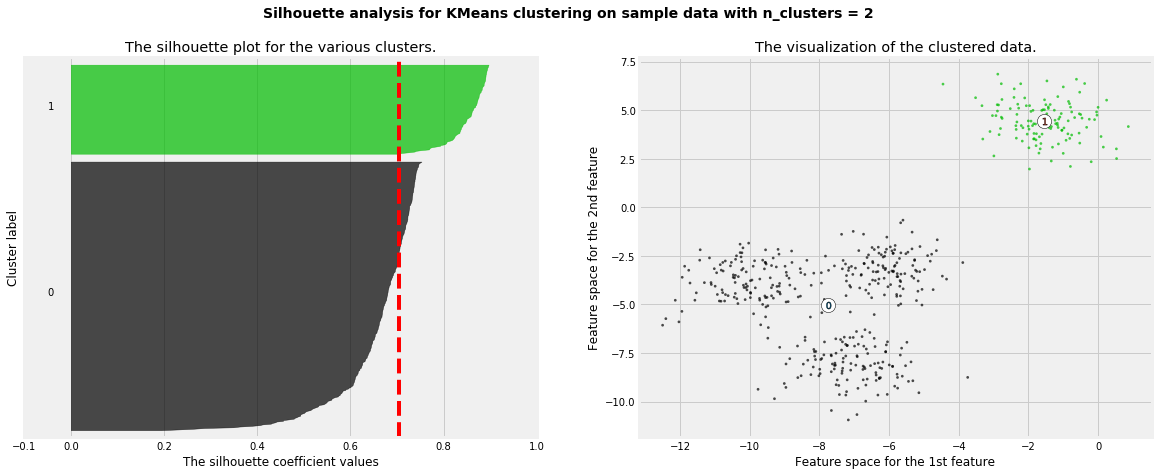

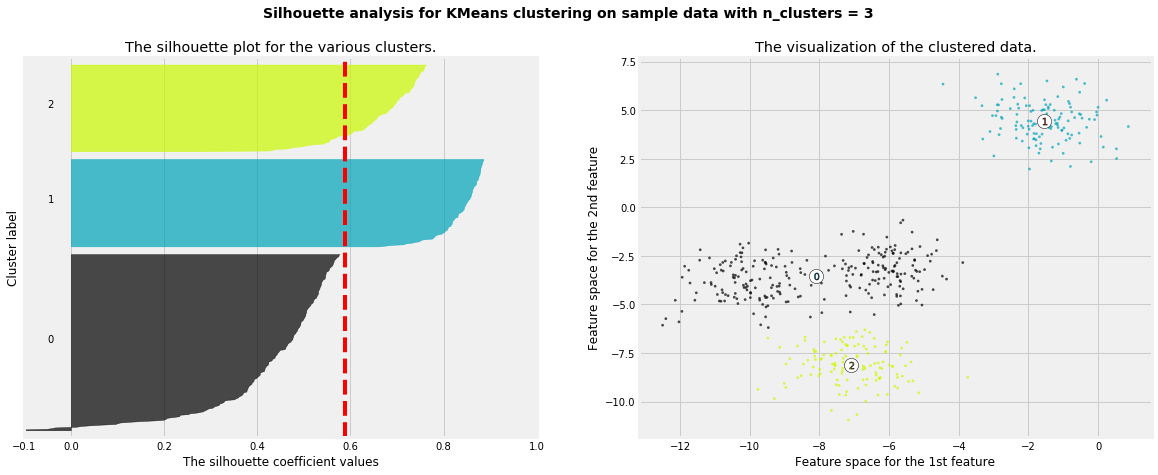

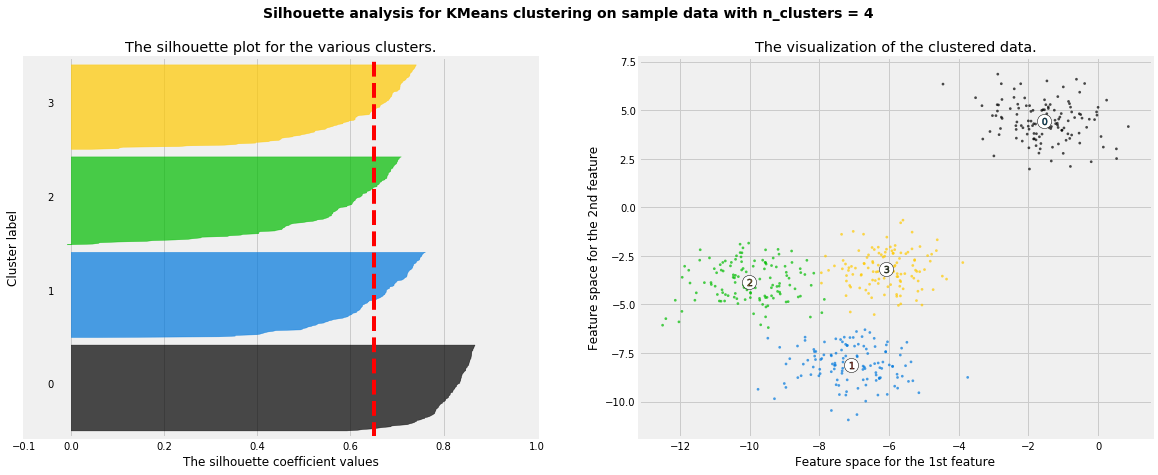

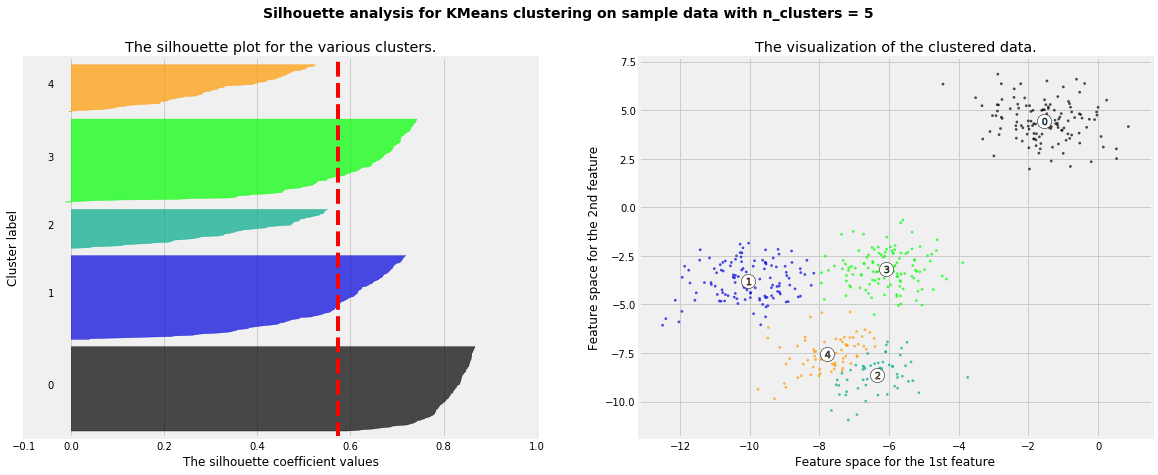

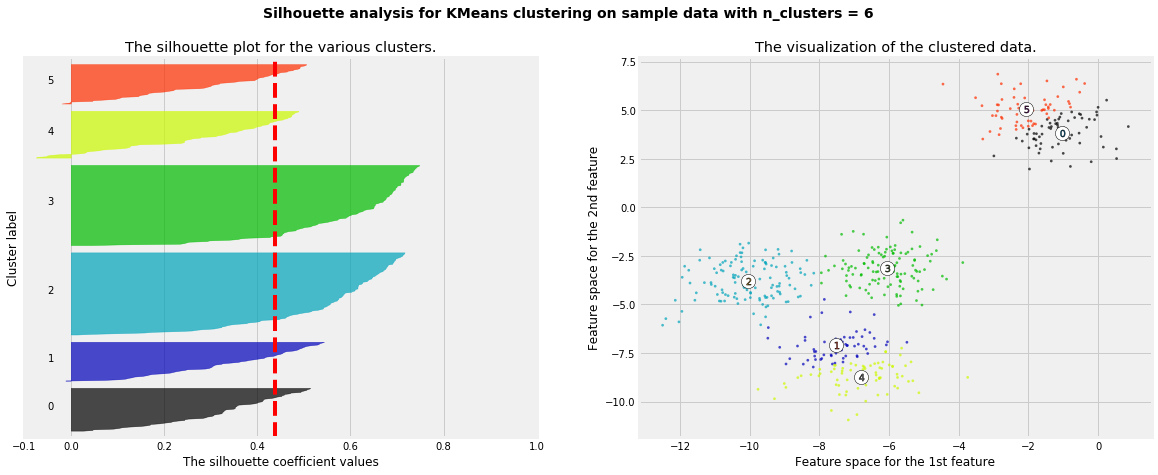

In [152]:

# In[ ]
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
# 시각화 예제
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

k-means로 Season 변수를 나누었을때 실루엣계수가 0.461으로 막 크게 좋지는 않다.
클러스터 갯수를 나누어 시각화를 했을때 4개의 그룹으로 나누었을때가 가장 각 클러스터간 실루엣 계수가 동일하여 이상적이었다.

4개의 클러스터로 나누었지만 전체 데이터를 파악하는데는 큰 의미는 없어보인다.